In [1]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer

# Load the Excel file
file_path = 'Ideas1_Cost.xlsx'
df_ideas = pd.read_excel(file_path)

# Import pre-trained model (full list: https://www.sbert.net/docs/pretrained_models.html)
model = SentenceTransformer("all-MiniLM-L6-v2")

# Embed vectors
embedding_arr = model.encode(df_ideas['ideas'].astype(str).tolist())

# Save the vectors in the "vector" column
df_ideas['vector'] = embedding_arr.tolist()

# Save the modified DataFrame back to the Excel file
df_ideas.to_excel(file_path, index=False)

print("Embeddings added and file saved successfully.")


C:\Users\Mohan Kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


Embeddings added and file saved successfully.


In [2]:
print(embedding_arr.shape)

(20, 384)


In [3]:
print(len(embedding_arr))

20


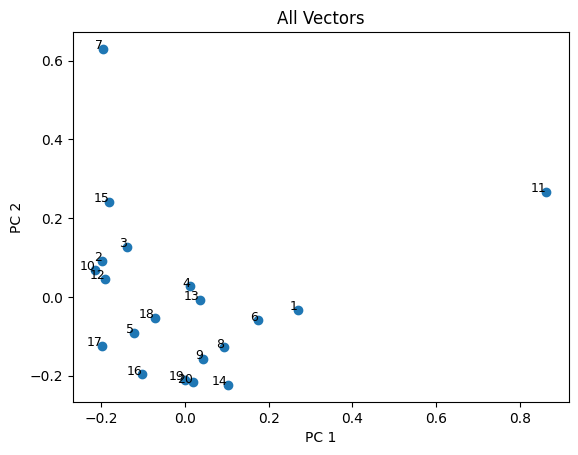

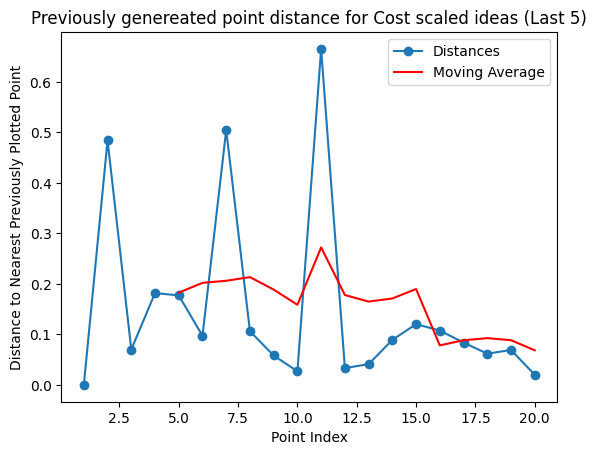

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

# Function to plot the vectors with numbered points starting from 1
def plot_vectors(vectors, title, indices):
    plt.figure()
    
    x = vectors[:, 0]
    y = vectors[:, 1]
    
    plt.scatter(x, y)
    
    # Annotate each point with its index (starting from 1)
    for i, index in enumerate(indices):
        plt.text(x[i], y[i], str(index + 1), fontsize=9, ha='right')
    
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title(title)
    
    plt.show()

# Function to plot distances to the nearest previously plotted point
def plot_distances_to_nearest(vectors, title):
    plt.figure()
    
    # Initialize list to store minimum distances
    min_distances = []
    
    # Calculate pairwise distances between all points
    dist_matrix = cdist(vectors, vectors)
    
    # Loop through each point to find its distance to the nearest previously plotted point
    for i in range(1, len(vectors)):
        min_dist = np.min(dist_matrix[i, :i])
        min_distances.append(min_dist)
    
    # Add a placeholder for the first point
    min_distances = [0] + min_distances
    
    # Calculate the moving average
    window_size = 5
    moving_avg = np.convolve(min_distances, np.ones(window_size)/window_size, mode='valid')
    
    # Plot the distances
    plt.plot(list(range(1, len(min_distances) + 1)), min_distances, 'o-', label='Distances')
    
    # Plot the moving average
    plt.plot(list(range(window_size, len(min_distances) + 1)), moving_avg, 'r-', label='Moving Average')
    
    plt.xlabel('Point Index')
    plt.ylabel('Distance to Nearest Previously Plotted Point')
    plt.title(title)
    plt.legend()
    
    plt.show()

# Apply PCA to reduce the vectors to 2 dimensions
pca = PCA(n_components=2)
embedding_pca = pca.fit_transform(embedding_arr)

# Extracting all 30 vectors
indices_all = list(range(20))
vectors_all_pca = embedding_pca[:20]
plot_vectors(vectors_all_pca, 'All Vectors', indices_all)
plot_distances_to_nearest(vectors_all_pca, 'Previously genereated point distance for Cost scaled ideas (Last 5)')


Embeddings added and file saved successfully.


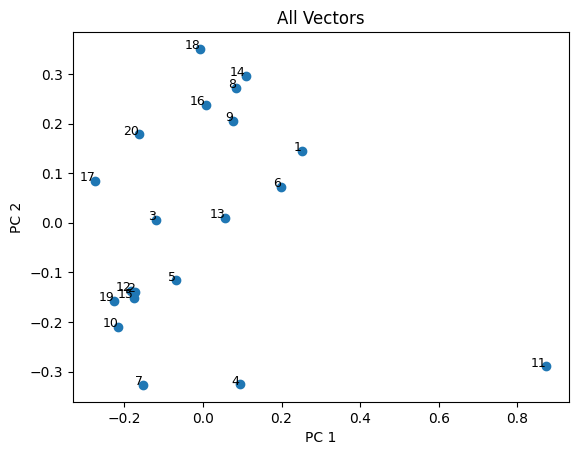

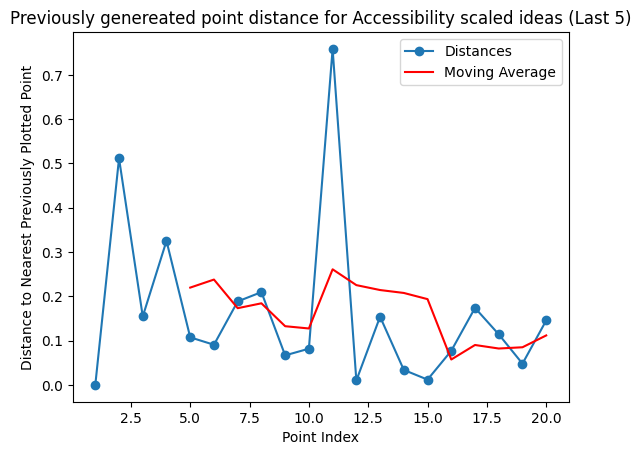

In [27]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer

# Load the Excel file
file_path = 'Ideas1_Accessibility.xlsx'
df_ideas = pd.read_excel(file_path)

# Import pre-trained model (full list: https://www.sbert.net/docs/pretrained_models.html)
model = SentenceTransformer("all-MiniLM-L6-v2")

# Embed vectors
embedding_arr_a = model.encode(df_ideas['ideas'].astype(str).tolist())

# Save the vectors in the "vector" column
df_ideas['vector'] = embedding_arr_a.tolist()

# Save the modified DataFrame back to the Excel file
df_ideas.to_excel(file_path, index=False)

print("Embeddings added and file saved successfully.")




import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

# Function to plot the vectors with numbered points starting from 1
def plot_vectors(vectors, title, indices):
    plt.figure()
    
    x = vectors[:, 0]
    y = vectors[:, 1]
    
    plt.scatter(x, y)
    
    # Annotate each point with its index (starting from 1)
    for i, index in enumerate(indices):
        plt.text(x[i], y[i], str(index + 1), fontsize=9, ha='right')
    
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title(title)
    
    plt.show()

# Function to plot distances to the nearest previously plotted point
def plot_distances_to_nearest(vectors, title):
    plt.figure()
    
    # Initialize list to store minimum distances
    min_distances = []
    
    # Calculate pairwise distances between all points
    dist_matrix = cdist(vectors, vectors)
    
    # Loop through each point to find its distance to the nearest previously plotted point
    for i in range(1, len(vectors)):
        min_dist = np.min(dist_matrix[i, :i])
        min_distances.append(min_dist)
    
    # Add a placeholder for the first point
    min_distances = [0] + min_distances
    
    # Calculate the moving average
    window_size = 5
    moving_avg = np.convolve(min_distances, np.ones(window_size)/window_size, mode='valid')
    
    # Plot the distances
    plt.plot(list(range(1, len(min_distances) + 1)), min_distances, 'o-', label='Distances')
    
    # Plot the moving average
    plt.plot(list(range(window_size, len(min_distances) + 1)), moving_avg, 'r-', label='Moving Average')
    
    plt.xlabel('Point Index')
    plt.ylabel('Distance to Nearest Previously Plotted Point')
    plt.title(title)
    plt.legend()
    
    plt.show()

# Apply PCA to reduce the vectors to 2 dimensions
pca = PCA(n_components=2)
embedding_pca_a = pca.fit_transform(embedding_arr_a)

# Extracting all 30 vectors
indices_all_a = list(range(20))
vectors_all_pca_a = embedding_pca_a[:20]
plot_vectors(vectors_all_pca_a, 'All Vectors', indices_all_a)
plot_distances_to_nearest(vectors_all_pca_a, 'Previously genereated point distance for Accessibility scaled ideas (Last 5)')


Embeddings added and file saved successfully.


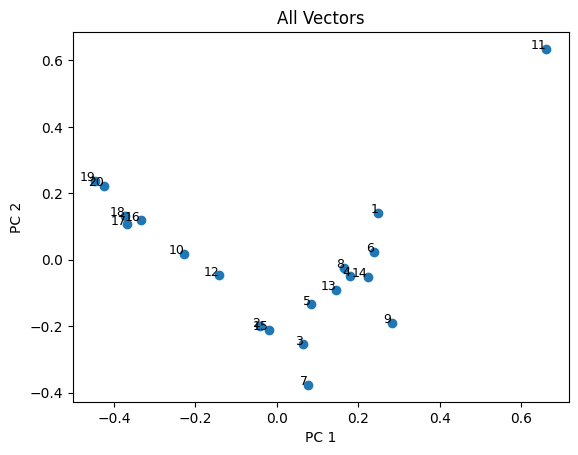

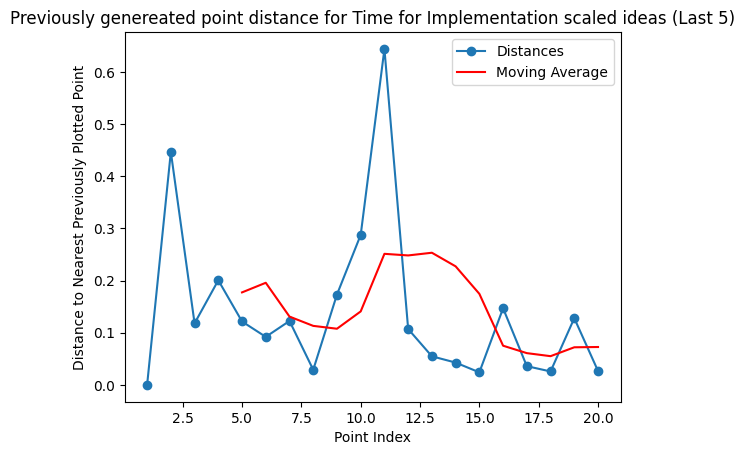

In [28]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer

# Load the Excel file
file_path = 'Ideas1_TimeforImplementation.xlsx'
df_ideas = pd.read_excel(file_path)

# Import pre-trained model (full list: https://www.sbert.net/docs/pretrained_models.html)
model = SentenceTransformer("all-MiniLM-L6-v2")

# Embed vectors
embedding_arr_t = model.encode(df_ideas['ideas'].astype(str).tolist())

# Save the vectors in the "vector" column
df_ideas['vector'] = embedding_arr_t.tolist()

# Save the modified DataFrame back to the Excel file
df_ideas.to_excel(file_path, index=False)

print("Embeddings added and file saved successfully.")




import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

# Function to plot the vectors with numbered points starting from 1
def plot_vectors(vectors, title, indices):
    plt.figure()
    
    x = vectors[:, 0]
    y = vectors[:, 1]
    
    plt.scatter(x, y)
    
    # Annotate each point with its index (starting from 1)
    for i, index in enumerate(indices):
        plt.text(x[i], y[i], str(index + 1), fontsize=9, ha='right')
    
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title(title)
    
    plt.show()

# Function to plot distances to the nearest previously plotted point
def plot_distances_to_nearest(vectors, title):
    plt.figure()
    
    # Initialize list to store minimum distances
    min_distances = []
    
    # Calculate pairwise distances between all points
    dist_matrix = cdist(vectors, vectors)
    
    # Loop through each point to find its distance to the nearest previously plotted point
    for i in range(1, len(vectors)):
        min_dist = np.min(dist_matrix[i, :i])
        min_distances.append(min_dist)
    
    # Add a placeholder for the first point
    min_distances = [0] + min_distances
    
    # Calculate the moving average
    window_size = 5
    moving_avg = np.convolve(min_distances, np.ones(window_size)/window_size, mode='valid')
    
    # Plot the distances
    plt.plot(list(range(1, len(min_distances) + 1)), min_distances, 'o-', label='Distances')
    
    # Plot the moving average
    plt.plot(list(range(window_size, len(min_distances) + 1)), moving_avg, 'r-', label='Moving Average')
    
    plt.xlabel('Point Index')
    plt.ylabel('Distance to Nearest Previously Plotted Point')
    plt.title(title)
    plt.legend()
    
    plt.show()

# Apply PCA to reduce the vectors to 2 dimensions
pca = PCA(n_components=2)
embedding_pca_t = pca.fit_transform(embedding_arr_t)

# Extracting all 30 vectors
indices_all_t = list(range(20))
vectors_all_pca_t = embedding_pca_t[:20]
plot_vectors(vectors_all_pca_t, 'All Vectors', indices_all_t)
plot_distances_to_nearest(vectors_all_pca_t, 'Previously genereated point distance for Time for Implementation scaled ideas (Last 5)')
